In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ml_utils import *

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
 'Central Air', 'Total Bsmt SF', 'SalePrice']

In [5]:
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',
 sep='\t',usecols=columns)
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [6]:
df.replace({'Y': 1, 'N': 0}, inplace=True)

In [7]:
df.dropna(axis='index', inplace=True)

In [8]:
df.isna().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 0 to 2929
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2929 non-null   int64  
 1   Overall Cond   2929 non-null   int64  
 2   Total Bsmt SF  2929 non-null   float64
 3   Central Air    2929 non-null   int64  
 4   Gr Liv Area    2929 non-null   int64  
 5   SalePrice      2929 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 160.2 KB


In [10]:
df.describe()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
count,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000
mean,6.095596,5.562649,1051.614544,0.933083,1499.896552,180830.814612
std,1.410736,1.111409,440.615067,0.249921,505.472056,79878.175546
min,1.000000,1.000000,0.000000,0.000000,334.000000,12789.000000
25%,5.000000,5.000000,793.000000,1.000000,1126.000000,129500.000000
50%,6.000000,5.000000,990.000000,1.000000,1442.000000,160000.000000
75%,7.000000,6.000000,1302.000000,1.000000,1743.000000,213500.000000
max,10.000000,9.000000,6110.000000,1.000000,5642.000000,755000.000000


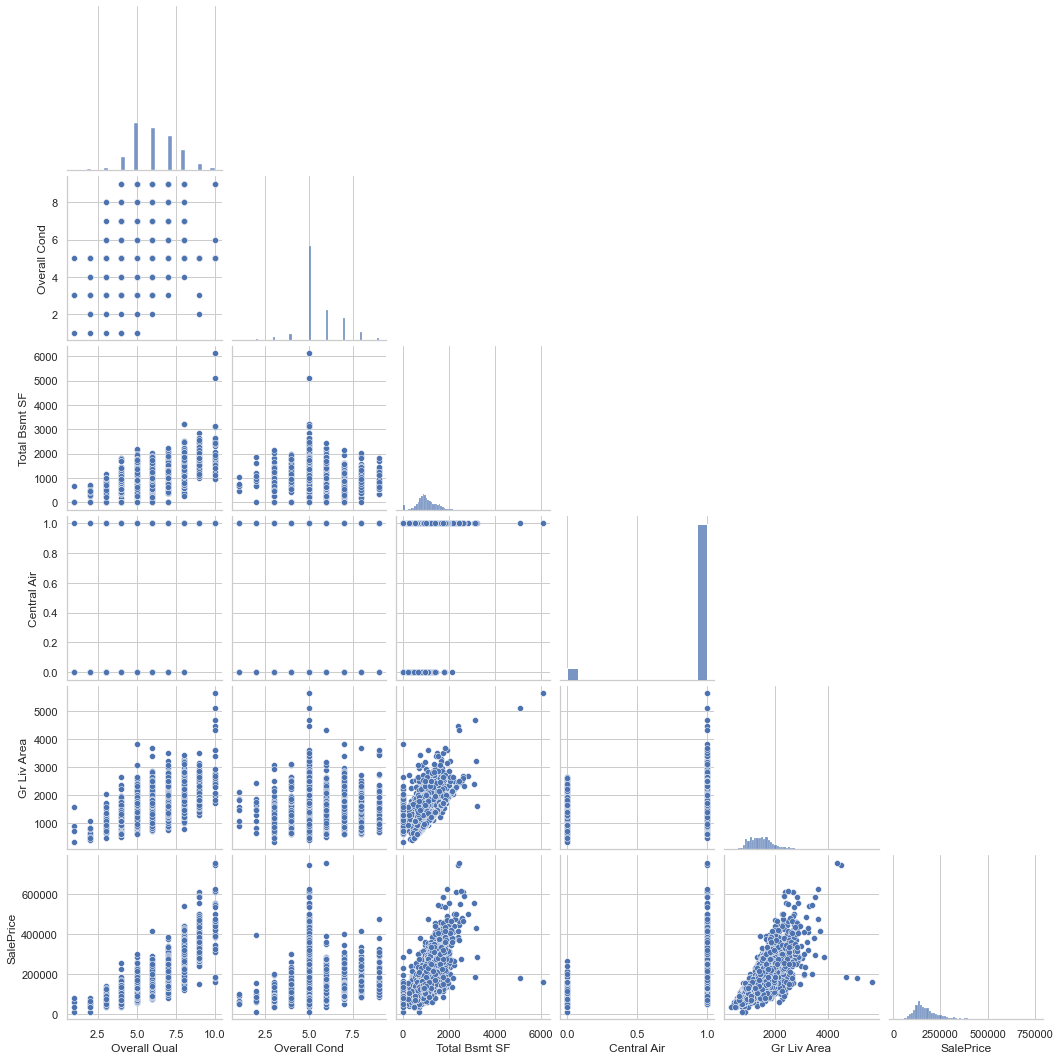

In [11]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df, height=2.5, corner=True)
plt.show()

<AxesSubplot:>

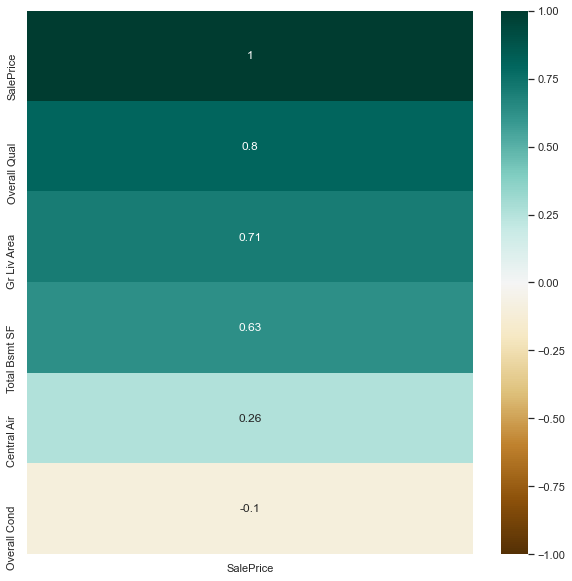

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap( df.corr()[['SalePrice']].sort_values( by = 'SalePrice', ascending=False), 
            vmin=-1, vmax=1, annot=True, cmap='BrBG')

## Solving regression for regression parameters with gradient descent

In [13]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    def predict(self, X):
        return self.net_input(X)

In [14]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std, y_std)

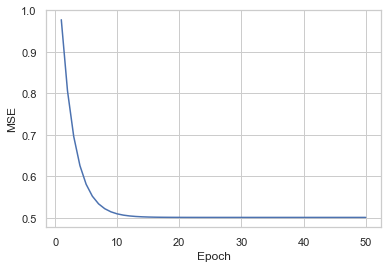

In [15]:
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

In [16]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)

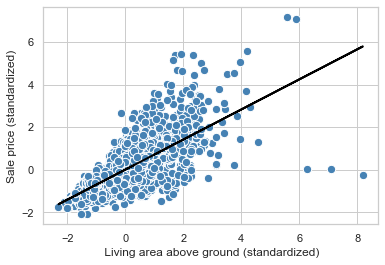

In [17]:
lin_regplot(X_std, y_std, lr)
plt.xlabel(' Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')
plt.show()

In [18]:
#In this code example, we used the previously trained linear regression model to predict the price of
#a house with an aboveground living area of 2,500 square feet. According to our model, such a house will be worth $292,507.07.
feature_std = sc_x.transform(np.array([[2500]]))
target_std = lr.predict(feature_std)
target_reverted = sc_y.inverse_transform(target_std.reshape(-1, 1))
print(f'Sales price: ${target_reverted.flatten()[0]:.2f}')

Sales price: $292507.07


In [19]:
print(f'Slope: {lr.w_[0]:.3f}')

print(f'Intercept: {lr.b_[0]:.3f}')

Slope: 0.707
Intercept: -0.000


## Estimating the coefficient of a regression model via scikit-learn

In [20]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Intercept: {slr.intercept_:.3f}')


Slope: 111.666
Intercept: 13342.979


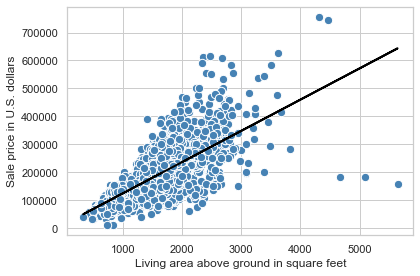

In [21]:
lin_regplot(X, y, slr)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.tight_layout()
plt.show()

## Fitting a robust regression model using RANSAC

In [22]:
#By default (via residual_threshold=None), scikit-learn uses the MAD estimate to select the inlier
#threshold, where MAD stands for the median absolute deviation of the target values, y. However, the
#choice of an appropriate value for the inlier threshold is problem-specific, which is one disadvantage
#of RANSAC.

from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(
LinearRegression(),
max_trials=100, # default value
min_samples=0.95,
residual_threshold=None, # default value
random_state=123)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=0.95,
                random_state=123)

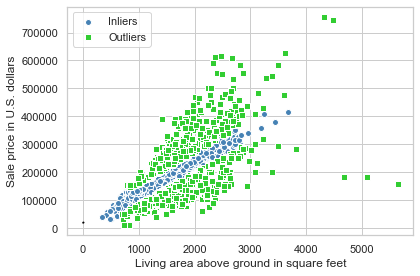

In [23]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
c='steelblue', edgecolor='white',
marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
c='limegreen', edgecolor='white',
marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}')

print(f'Intercept: {ransac.estimator_.intercept_:.3f}')


Slope: 106.348
Intercept: 20190.093


In [25]:
#The MAD, for this dataset, can be computed  as follows:
def mean_absolute_deviation(data):
    return np.mean(np.abs(data - np.mean(data)))
mean_absolute_deviation(y)

58269.561754979375

In [26]:
#linear regression model with a residual threshold of 65,000:

from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(
LinearRegression(),
max_trials=100, # default value
min_samples=0.95,
residual_threshold=65000, # default value
random_state=123)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=0.95,
                random_state=123, residual_threshold=65000)

In [27]:
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}')

print(f'Intercept: {ransac.estimator_.intercept_:.3f}')


Slope: 105.631
Intercept: 18314.587


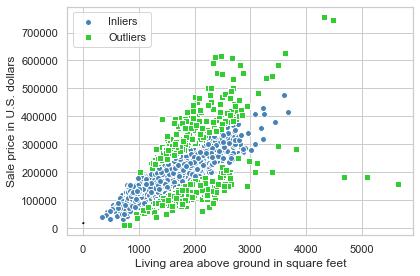

In [28]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
c='steelblue', edgecolor='white',
marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
c='limegreen', edgecolor='white',
marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [29]:
# Using RANSAC, we reduced the potential effect of the outliers in this dataset, but we don’t know whether
#this approach will have a positive effect on the predictive performance for unseen data or not. Thus,
#in the next section, we will look at different approaches for evaluating a regression model, which is
#a crucial part of building systems for predictive modeling.

## Evaluating the performance of linear regression models

In [30]:
from sklearn.model_selection import train_test_split
target = 'SalePrice'
features = df.columns[df.columns != target]
X = df[features].values
y = df[target].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=123)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

## Residual plots

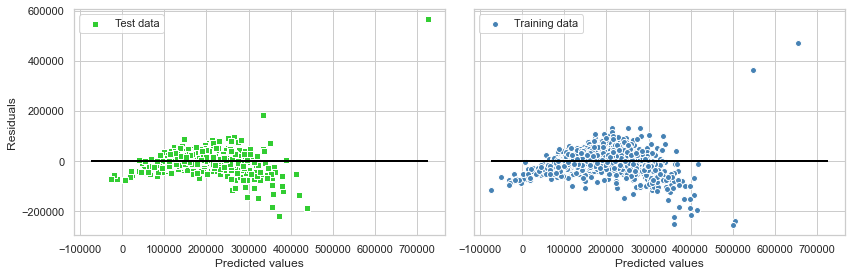

In [32]:
x_max = np.max(
[np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min(
[np.min(y_train_pred), np.min(y_test_pred)])
fig, (ax1, ax2) = plt.subplots(
1, 2, figsize=(12, 4), sharey=True)
ax1.scatter(
y_test_pred, y_test_pred - y_test,
c='limegreen', marker='s',
edgecolor='white',
label='Test data')
ax2.scatter(
y_train_pred, y_train_pred - y_train,
c='steelblue', marker='o', edgecolor='white',
label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100,\
    color='black', lw=2)
    plt.tight_layout()
plt.show() 

In [33]:
np.min(y_test), np.min(y_train)

(35311, 12789)

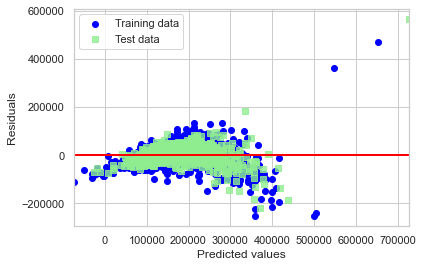

In [34]:
plt.scatter(y_train_pred, y_train_pred - y_train,
c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
c='lightgreen', marker='s', label='Test data', alpha=.8)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=x_min-100, xmax=x_max+100, lw=2, color='red')
plt.xlim([x_min, x_max])
plt.show()


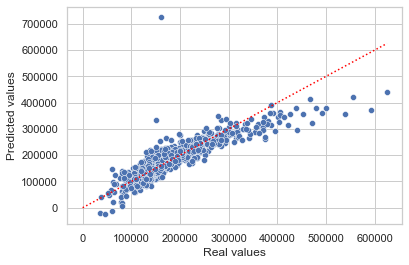

In [35]:
x = np.linspace(0, y_test.max())
y = x

plt.plot(x, y, color="red", ls=":")

sns.scatterplot(x=y_test, y=y_test_pred)

plt.xlabel("Real values")
plt.ylabel("Predicted values")

plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
mean_squared_error(y_train, y_train_pred),
mean_squared_error(y_test, y_test_pred)))


MSE train: 1497216245.853, test: 1516565820.999


In [37]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')

print(f'MAE test: {mae_test:.2f}')


MAE train: 25983.03
MAE test: 24921.29


In [38]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

R^2 train: 0.769, test: 0.752


In [39]:
ransac.fit(X_train, y_train)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=0.95,
                random_state=123, residual_threshold=65000)

In [40]:
y_test_pred = ransac.predict(X_test)

In [41]:
y_train_pred = ransac.predict(X_train)

In [42]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

R^2 train: 0.767, test: 0.745


## Turning a linear regression model into a curve – polynomial regression

In [43]:
# toy problem
from sklearn.preprocessing import PolynomialFeatures
X = np.array([ 258.0, 270.0, 294.0, 320.0, 342.0,
368.0, 396.0, 446.0, 480.0, 586.0])\
[:, np.newaxis]
y = np.array([ 236.4, 234.4, 252.8, 298.6, 314.2,
342.2, 360.8, 368.0, 391.2, 390.8])
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [44]:
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

In [45]:
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

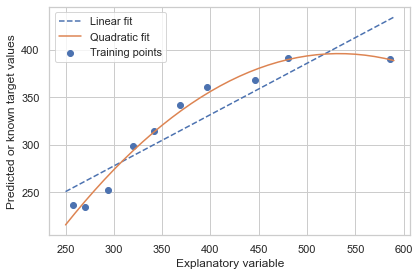

In [46]:
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit,
label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit,
label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [47]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
mse_lin = mean_squared_error(y, y_lin_pred)
mse_quad = mean_squared_error(y, y_quad_pred)
print(f'Training MSE linear: {mse_lin:.3f}'
 f', quadratic: {mse_quad:.3f}')

r2_lin = r2_score(y, y_lin_pred)
r2_quad = r2_score(y, y_quad_pred)
print(f'Training R^2 linear: {r2_lin:.3f}'
f', quadratic: {r2_quad:.3f}')


Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


## Modeling nonlinear relationships in the Ames Housing dataset

In [48]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values
X = X[(df['Gr Liv Area'] < 4000)]
y = y[(df['Gr Liv Area'] < 4000)]

#X = df[['Overall Qual']].values
#y = df['SalePrice'].values

In [49]:
regr = LinearRegression()
# create quadratic and cubic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [50]:
# fit to features
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

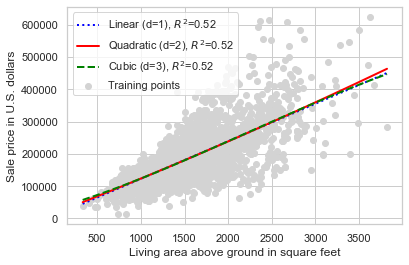

In [51]:
# plot results
plt.scatter(X, y, label='Training points', color='lightgray')
plt.plot(X_fit, y_lin_fit,
        label=f'Linear (d=1), $R^2$={linear_r2:.2f}',
        color='blue',
        lw=2,
        linestyle=':')
plt.plot(X_fit, y_quad_fit,
        label=f'Quadratic (d=2), $R^2$={quadratic_r2:.2f}',
        color='red',
        lw=2,
        linestyle='-')
plt.plot(X_fit, y_cubic_fit,
        label=f'Cubic (d=3), $R^2$={cubic_r2:.2f}',
        color='green',
        lw=2,
        linestyle='--')
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')
plt.show() 

In [52]:
X = df[['Overall Qual']].values
y = df['SalePrice'].values

In [53]:
regr = LinearRegression()
# create quadratic and cubic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [54]:
# fit to features
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

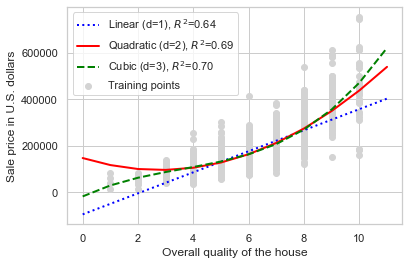

In [55]:
#plot results
plt.scatter(X, y, label='Training points', color='lightgray')
plt.plot(X_fit, y_lin_fit,
        label=f'Linear (d=1), $R^2$={linear_r2:.2f}',
        color='blue',
        lw=2,
        linestyle=':')
plt.plot(X_fit, y_quad_fit,
        label=f'Quadratic (d=2), $R^2$={quadratic_r2:.2f}',
        color='red',
        lw=2,
        linestyle='-')
plt.plot(X_fit, y_cubic_fit,
        label=f'Cubic (d=3), $R^2$={cubic_r2:.2f}',
        color='green',
        lw=2,
        linestyle='--')
plt.xlabel('Overall quality of the house')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')
plt.show() 

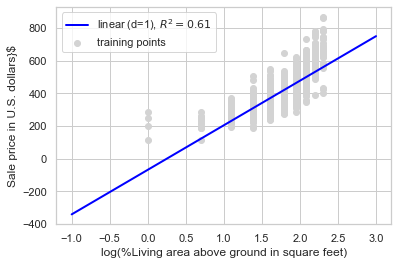

In [56]:
#transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)
# fit features
X_fit = np.arange(X_log.min()-1,
X_log.max()+1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))
# plot results
plt.scatter(X_log, y_sqrt,
           label='training points',
           color='lightgray')
plt.plot(X_fit, y_lin_fit,
         label='linear (d=1), $R^2=%.2f$' % linear_r2,
         color='blue',
         lw=2)
plt.xlabel('log(%Living area above ground in square feet)')
plt.ylabel('Sale price in U.S. dollars}$')
plt.legend(loc='upper left')
plt.show()


## Using regularized methods for regression

In [57]:
df

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900
...,...,...,...,...,...,...
2925,6,6,1003.0,1,1003,142500
2926,5,5,864.0,1,902,131000
2927,5,5,912.0,1,970,132000
2928,5,5,1389.0,1,1389,170000


In [58]:
X = df.drop(columns='SalePrice')

In [59]:
y = df['SalePrice']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=123)

Modelo com espaço de features transformado!

Número de features original: 5
Número de features após o transformer: 251



C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.125e+11, tolerance: 1.332e+09
  model = cd_fast.enet_coordinate_descent(



Métricas de avaliação (dados de treino):



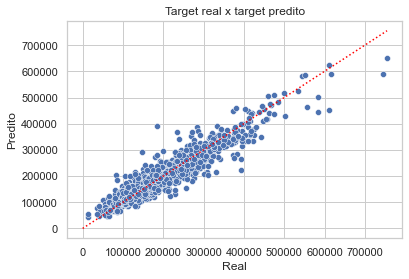

R^2: 0.88
MAE: 19983.26
RMSE: 28062.50
MAPE: 12.28%

Distribuição dos resíduos de treino:

count    2.050000e+03
mean     2.100445e-11
std      2.806935e+04
min     -2.068650e+05
25%     -1.481681e+04
50%      2.161791e+01
75%      1.473525e+04
max      1.679748e+05
dtype: float64


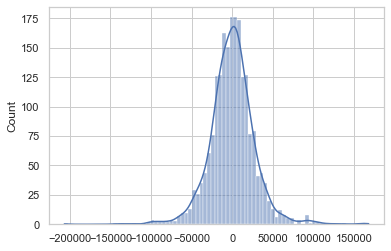


##################################################

Métricas de avaliação (dados de teste):



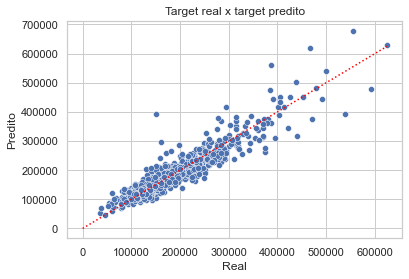

R^2: 0.86
MAE: 20275.53
RMSE: 29478.57
MAPE: 11.93%

Distribuição dos resíduos de teste:

count       879.000000
mean      -1004.751428
std       29478.212743
min     -241318.022836
25%      -14593.204164
50%        -976.289279
75%       15053.473356
max      146337.197945
dtype: float64


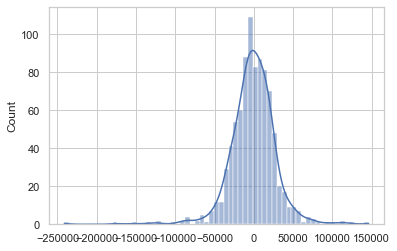

(Lasso(alpha=1.1),
 {'r2': 0.8787591677603278,
  'mae': 19983.256708330042,
  'rmse': 28062.502487536745,
  'mape': 0.12284833860259511},
 {'r2': 0.8576533955117361,
  'mae': 20275.527496303006,
  'rmse': 29478.567949055865,
  'mape': 0.1193092536320356})

In [88]:
reg_lin_poly_features_regularized(X_train, y_train, X_test, y_test, 
                                      deg=5,
                                      type_regularization='l1', alpha=1.1, l1_ratio=0.5,
                                      iter_max=1000,
                                      plot=True, scale_mms=True, 
                                      train_metrics=True, 
                                      dist_resids=True,
                                      plot_model=False)

## Dealing with nonlinear relationships using random forests

### Decision tree regression

In [62]:
from sklearn.tree import DecisionTreeRegressor
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=3)

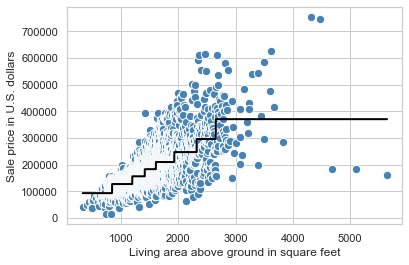

In [63]:
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.show()

## Random forest regression

In [64]:
target = 'SalePrice'
features = df.columns[df.columns != target]
X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=123)
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(
n_estimators=1000,
criterion='squared_error',
random_state=1,
n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')

print(f'MAE test: {mae_test:.2f}')
r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R^2 train: {r2_train:.2f}')

print(f'R^2 test: {r2_test:.2f}')


MAE train: 8305.18
MAE test: 20821.77
R^2 train: 0.98
R^2 test: 0.85


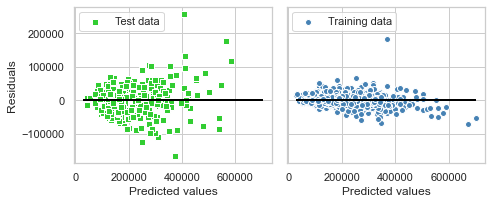

In [65]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',label='Training data')
ax1.set_ylabel('Residuals')
for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100,
              color='black', lw=2)
plt.tight_layout()
plt.show()

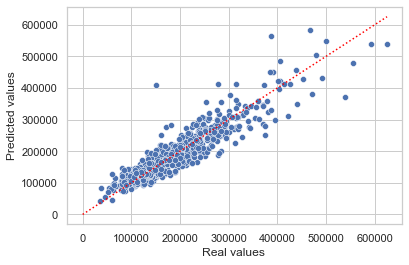

In [67]:
x = np.linspace(0, y_test.max())
y = x

plt.plot(x, y, color="red", ls=":")

sns.scatterplot(x=y_test, y=y_test_pred)

plt.xlabel("Real values ")
plt.ylabel("Predicted values")

plt.show()